In [5]:
import pandas as pd

In [6]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/hw2/2017_jun_final - 2017_jun_final.csv')

df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [8]:
df.shape

(8704, 25)

In [9]:
df.dtypes

,0
N,int64
Посада,object
Мова програмування,object
Спеціалізація,object
Загальний досвід роботи,object
Досвід роботи на поточному місці,object
Зарплата на місяць,int64
Зміна зарплати за 12 місяців,int64
Місто,object
Розмір компанії,object


In [10]:
empty_value_columns = []

for column in df.columns:
  count_empty_values = df[column].isnull().sum()

  if count_empty_values > 0:
    empty_value_columns.append(column)
    print(column, count_empty_values)

Мова програмування 3850
Спеціалізація 7219
Університет 358
Предметна область 223
Валюта 8694
cls 1574


In [11]:
empty_value_columns = [col for col in empty_value_columns if col != 'Мова програмування']

empty_value_columns

['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']

In [12]:
df.drop(labels=empty_value_columns, axis='columns', inplace=True)


In [13]:
for column in df.columns:
  count_empty_values = df[column].isnull().sum()

  if count_empty_values > 0:
    print(column, count_empty_values)

Мова програмування 3850


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(4854, 20)

In [16]:
python_data = df[df['Мова програмування'] == 'Python']
python_data.shape

(207, 20)

In [17]:
grouped = python_data.groupby(['Посада'])
grouped.count()

,N,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
Посада,,,,,,,,,,,,,,,,,,,
Junior Software Engineer,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
Senior Software Engineer,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Software Engineer,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
System Architect,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Technical Lead,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [18]:
new_df = grouped.agg({ "Зарплата на місяць": ['min', 'max'] })
new_df

Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200

In [19]:
def fill_avg_salary(salary):
  return salary.values.mean()

new_df['avg'] = new_df.apply(fill_avg_salary, axis=1)
new_df

Зарплата на місяць           avg
                                        min   max        
Посада                                                   
Junior Software Engineer                100  1250   675.0
Senior Software Engineer               1300  9200  5250.0
Software Engineer                       500  5400  2950.0
System Architect                       3000  5000  4000.0
Technical Lead                         1425  6200  3812.5

In [20]:
described_df = new_df['avg'].describe()

In [21]:
described_df.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset/hw2/hw2.2.csv", index=False)


[Text(0.5, 1.0, 'Рівень зарплати залежно від досвіду роботи')]

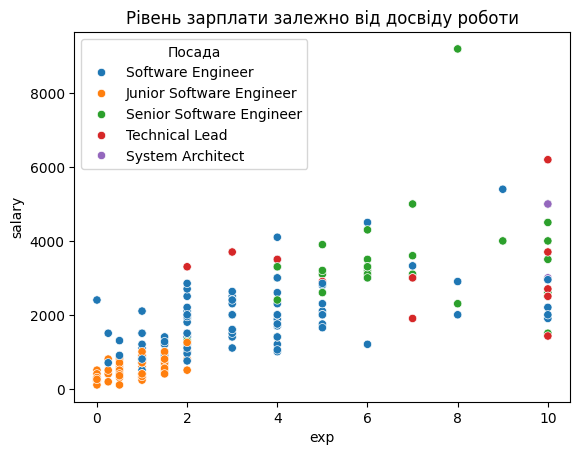

In [24]:
import seaborn as sns

sns.scatterplot(data=python_data, x='exp', y='salary', hue='Посада').set(title='Рівень зарплати залежно від досвіду роботи')

<Axes: xlabel='Місто', ylabel='mean_salary'>

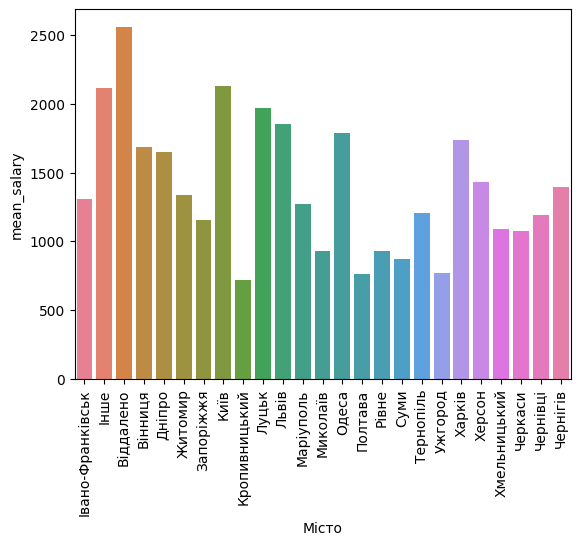

In [32]:
df_mean_salary_city = df[['Місто', 'salary']].groupby('Місто').agg(mean_salary=('salary', 'mean'))
axes = sns.barplot(data=df_mean_salary_city, x='Місто', y='mean_salary', hue='Місто')
axes.tick_params(axis='x', rotation=90)
axes


<Axes: xlabel='Мова програмування', ylabel='mean_salary'>

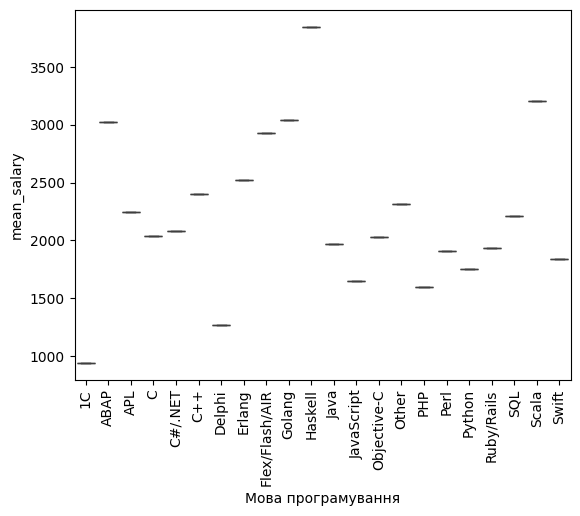

In [40]:
df_mean_salary_lang = df[['Мова програмування', 'salary']].groupby('Мова програмування').agg(mean_salary=('salary', 'mean'))

df_mean_salary_lang
axes = sns.boxplot(data=df_mean_salary_lang, x='Мова програмування', y='mean_salary', hue='Мова програмування')
axes.tick_params(axis='x', rotation=90)
axes